In [7]:
import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(777)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(745)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
tf.random.set_seed(1234455)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional, Activation, SimpleRNN
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [3]:
dataset = pd.read_csv(r'df_prova.csv', parse_dates = ['Data'])

dataset = dataset['PUN'].values

dataset

Training_set = dataset[:26112]
Test_set = dataset[26112:]

Training_set = Training_set.reshape(-1, 1)

In [4]:
sc = MinMaxScaler(feature_range=(0,1))

In [5]:
training_set_scaled = sc.fit_transform(Training_set)

In [47]:
X_train = []
y_train = []
for i in range(24,26112):
    X_train.append(training_set_scaled[i-24:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [52]:
regressorRNN = Sequential()
# First RNN layer with Dropout regularisation
regressorRNN.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorRNN.add(Dropout(0.1))
# Second RNN layer
regressorRNN.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorRNN.add(Dropout(0.1))
# Third RNN layer
regressorRNN.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorRNN.add(Dropout(0.1))
# Fourth RNN layer
regressorRNN.add(SimpleRNN(units=100, activation='tanh'))
regressorRNN.add(Dropout(0.1))
# The output layer
regressorRNN.add(Dense(units=1))
# Compiling the RNN
regressorRNN.compile(optimizer='adam',loss='mean_squared_error',
                    ) #RMSPROP faceva schifo (prendeva solo il sopra), adam prende tutto.
# Fitting to the training set
regressorRNN.fit(X_train,y_train,epochs=50,batch_size=38)

Epoch 1/50
26088/26088 [==============================] - 9s 350us/step - loss: 0.0718
Epoch 2/50
26088/26088 [==============================] - 9s 330us/step - loss: 0.0084
Epoch 3/50
26088/26088 [==============================] - 8s 325us/step - loss: 0.0033
Epoch 4/50
26088/26088 [==============================] - 11s 408us/step - loss: 0.0020
Epoch 5/50
26088/26088 [==============================] - 10s 366us/step - loss: 0.0015
Epoch 6/50
26088/26088 [==============================] - 9s 359us/step - loss: 0.0012
Epoch 7/50
26088/26088 [==============================] - 10s 365us/step - loss: 0.0011
Epoch 8/50
26088/26088 [==============================] - 10s 368us/step - loss: 0.0011
Epoch 9/50
26088/26088 [==============================] - 10s 372us/step - loss: 9.5889e-04
Epoch 10/50
26088/26088 [==============================] - 10s 368us/step - loss: 9.2737e-04
Epoch 11/50
26088/26088 [==============================] - 9s 363us/step - loss: 8.8014e-04
Epoch 12/50
26088/26088

In [53]:
d = pd.read_csv(r'df_prova.csv', parse_dates = ['Data'])
d = d['PUN']
inputs = d[len(d) - len(Test_set)-24:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [54]:
X_test = []
for i in range(24,192):
    X_test.append(inputs[i-24:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_test_price = regressorRNN.predict(X_test)
predicted_test_price = sc.inverse_transform(predicted_test_price)

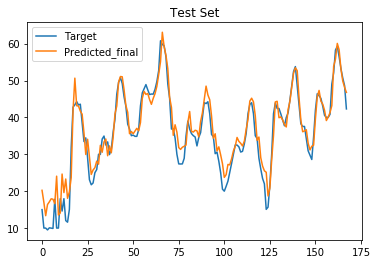

In [55]:
plt.plot(Test_set, label = 'Target')
plt.plot(predicted_test_price, label = 'Predicted_final')
plt.title('Test Set')
plt.legend()
plt.savefig('testRNN_2.png')

In [56]:
print('MAE: ', np.round(mean_absolute_error(Test_set, predicted_test_price), 3))
print('RMSE: ', np.round(math.sqrt(mean_squared_error(Test_set, predicted_test_price)), 3))
print('MAPE: ', np.round(math.sqrt(mean_absolute_percentage_error(Test_set, predicted_test_price)), 3))

MAE:  2.686
RMSE:  3.586
MAPE:  7.017


In [57]:
inputs = d[:len(Training_set)+24].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [58]:
X_train = []
for i in range(24,26136):
    X_train.append(inputs[i-24:i,0])
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], 24 ,1))
predicted_train_price = regressorRNN.predict(X_train)
predicted_train_price = sc.inverse_transform(predicted_train_price)

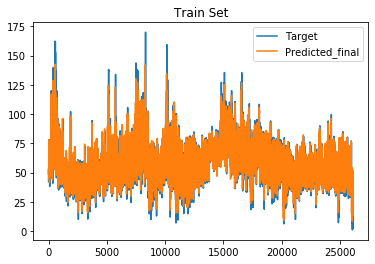

In [59]:
plt.plot(Training_set, label = "Target")
plt.plot(predicted_train_price, label = "Predicted_final")
plt.title('Train Set')
plt.legend()
plt.savefig('TrainRNN_2.png')

In [60]:
print('MAE: ', np.round(mean_absolute_error(Training_set, predicted_train_price),3))
print('RMSE: ', np.round(math.sqrt(mean_squared_error(Training_set, predicted_train_price)), 3))
print('MAPE: ', np.round(math.sqrt(mean_absolute_percentage_error(Training_set, predicted_train_price)), 3))

MAE:  6.394
RMSE:  9.199
MAPE:  3.528
